In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Func for directory
def file_path(path):
    directory=pd.read_csv(path,encoding='windows-1251')
    return directory

''' Task 1'''

In [3]:
user_data=file_path("https://stepik.org/media/attachments/lesson/360348/user_data.csv")
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
logs=file_path("https://stepik.org/media/attachments/lesson/360348/logs.csv")
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


'''REMEMBER''
# Сколько значений
logs.success.value_counts()
# Сколько уникальных значений
logs.platform.nunique()
# Пропущенные значения
user_data.isna()
user.data.isnull()
# Конвертация в строку
', '.join([str(client) for client in successful_clients])

# USER_DATA

In [5]:
# USER_DATA
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [6]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [7]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [8]:
# JOIN двух датасетов
data=user_data.merge(logs, on='client', how='inner')
data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [9]:
# ОТбор по преимум клиентам
data.query('premium==True').platform.value_counts().idxmax()

'phone'

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге.

<AxesSubplot:xlabel='age', ylabel='Count'>

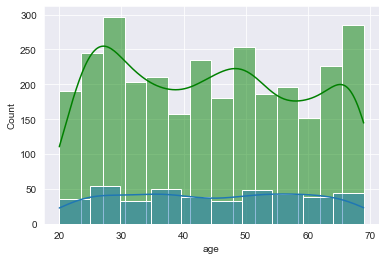

In [10]:
# CHART
sns.histplot(data.query('premium==False').age, kde=True, color='green')
sns.histplot(data.query('premium==True').age, kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

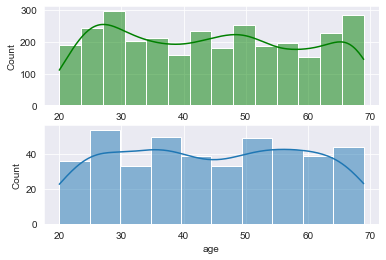

In [11]:
fif, ax = plt.subplots(nrows=2,ncols=1)
sns.histplot(data.query('premium==False').age, kde=True, color='green', ax=ax[0])
sns.histplot(data.query('premium==True').age, kde=True, ax=ax[1])

Постройте график распределения числа успешных операций:

x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

In [28]:
client_vs_success_number=data.groupby('client')\
    .agg({'success': 'sum'})

client_vs_success_number

,success
client,
40,1
75,1
81,1
132,1
164,1
...,...
99926,1
99927,1
99931,1


<AxesSubplot:ylabel='Count'>

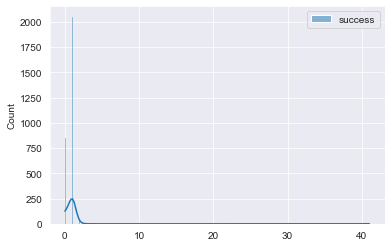

In [35]:
sns.histplot(client_vs_success_number, kde='False')

In [36]:
client_vs_success_number.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Полезные ссылки:

sns.countplot – документация к типу графика
figsize – про размер графиков
Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [41]:
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [58]:
# VARIANT 1
age_vs_success_number=data.query('platform=="computer"')\
    .groupby('age', as_index=False)\
    .agg({'success': 'sum'})
age_vs_success_number

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26
5,25,33
6,26,14
7,27,14
8,28,49
9,29,17


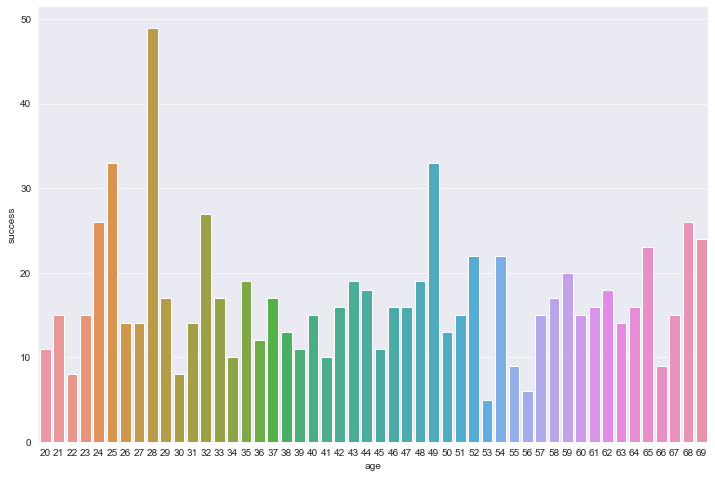

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(x=age_vs_success_number.age, y=age_vs_success_number.success)
sns.despine() # убрать часть рамки графика
plt.show()

In [61]:
# VARIANT 2
age_vs_success_number_2=data.query('platform=="computer" and success==True')
age_vs_success_number_2

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


C:\Users\bakhtiyar kolzhabai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

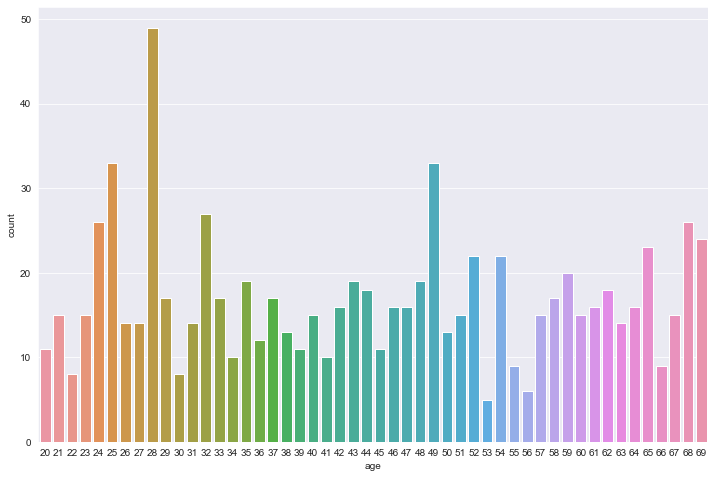

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(age_vs_success_number_2.age)

# LOGS

In [13]:
# LOGS
logs.platform.nunique()

3

In [14]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [15]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [16]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [17]:
success_number=logs.query('success==True')\
    .groupby('client', as_index=False)\
    .agg({'platform': 'count'})\
    .rename(columns={"platform": "success_number"})\
    .sort_values('success_number', ascending=False)


success_number

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [18]:
max_success=success_number.success_number.max()
max_success

41

In [19]:
successful_clients=success_number.query('success_number== @max_success')\
                .sort_values('client')\
                .client\
                .tolist()

successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [20]:
# Конвертация интеджер в строку
result=', '.join([str(client) for client in successful_clients])
result

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [21]:
# ALTERNATIVE VAR
success_number_2=logs\
        .groupby('client', as_index=False)\
        .agg({'success': 'sum'})\
        .rename(columns={"success": "success_number"})\
        .sort_values('success_number', ascending=False)


In [22]:
# С какой платформы было совершено наибольшее количество успешных операций?
logs.query('success==True').platform.value_counts()


phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64